In [11]:
import pandas as pd
file_path = 'C:/Users/PC/OneDrive/Máy tính/PYTHON/restaurant_data.csv'
restaurant_data = pd.read_csv(file_path)

Create a scatter plot to observe the relationship between X (Average Meal Pric) and (Revenue).

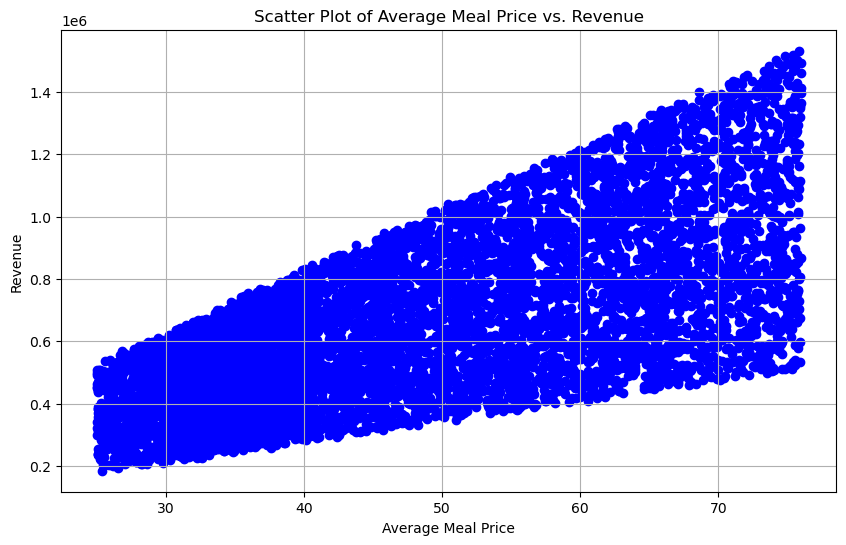

In [4]:
import matplotlib.pyplot as plt
X = restaurant_data['Average Meal Price']
Y = restaurant_data['Revenue']

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue')
plt.title('Scatter Plot of Average Meal Price vs. Revenue')
plt.xlabel('Average Meal Price')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

Compute the sample correlation coefficient.

In [5]:
correlation_coefficient = X.corr(Y)
print(correlation_coefficient)

0.686364681101729


Find the equation of the estimated regression line, and use it to
predict a future value for Y.

In [13]:
from sklearn.linear_model import LinearRegression

X_reshaped = X.values.reshape(-1, 1)
Y_reshaped = Y.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X_reshaped, Y_reshaped)

slope = model.coef_[0][0]
intercept = model.intercept_[0]

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: 12802.282946350893
Intercept: 42883.986491109245


In [9]:
new_avg_meal_price = 80

predicted_revenue = slope * new_avg_meal_price + intercept
print(f"Predicted Revenue: {predicted_revenue}")


Predicted Revenue: 1067066.6221991808
